In [1]:
import pandas as pd
import datetime as dt
from namestand import downscore
import seaborn as sb
%matplotlib inline

In [2]:
def load_shootings(path):
    df = pd.read_csv(path)
    df.columns = downscore(df.columns)
    df = df.rename(columns={"killed": "dead", "wounded": "injured" })
    df["date"] = pd.to_datetime(df["date"])
    return df

In [3]:
paths = [
    "../data/2013MASTER.csv",
    "../data/2014MASTER.csv",
    "../data/2015CURRENT.csv"
]
shootings = pd.concat([ load_shootings(path) for path in paths ])[[
    "date", "location", "dead", "injured"
]].reset_index(drop=True).sort_values("date")

In [4]:
shootings.head()

,date,location,dead,injured
0,2013-01-01,"Sacramento, CA",4,0
1,2013-01-01,"Hawthorne, CA",1,3
2,2013-01-01,"McKeesport, PA",0,4
3,2013-01-01,"Lorain, OH",1,4
4,2013-01-05,"Aurora, CO",4,0


In [5]:
shootings.tail()

,date,location,dead,injured
1045,2015-11-23,"Houston, TX",1,3
1046,2015-11-24,"Conway, SC",0,4
1047,2015-11-26,"Boston, MA",1,3
1048,2015-11-27,"Sacramento, CA",2,2
1049,2015-11-27,"Colorado Springs, CO",3,9


In [6]:
total_days = (dt.date(2015, 12, 1) - dt.date(2013, 1, 1)).days
print(total_days)

1064


In [7]:
len(shootings)

1050

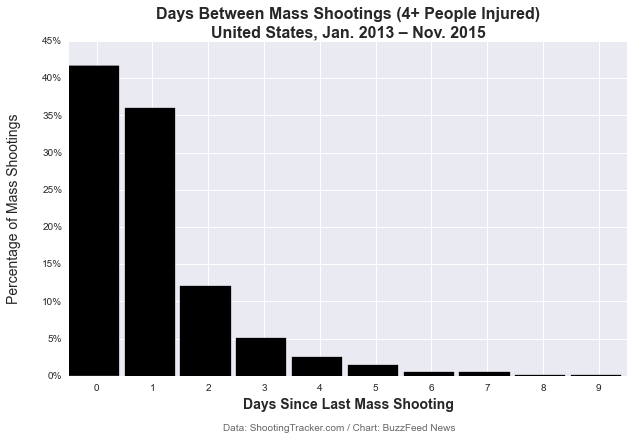

In [8]:
days_between_shootings = (shootings["date"] - shootings["date"].shift(1)).dropna().dt.days
days_max = int(days_between_shootings.max())
bins = list(range(0, days_max + 2, 1))
ax = days_between_shootings.hist(
    bins=bins,
    align='left',
    normed=True,
    figsize=(10, 6),
    color="black",
    width=0.9)
ax.figure.set_facecolor("white")
ax.set_xlim(-0.5, days_max + 0.5)
ax.set_xticks(bins[:-1])
ax.set_yticklabels([ "{0:.0f}%".format(y * 100)
    for y in ax.get_yticks() ])
ax.set_title("Days Between Mass Shootings (4+ People Injured)\nUnited States, Jan. 2013 – Nov. 2015", 
    fontsize=16, fontweight="bold")
ax.set_xlabel("Days Since Last Mass Shooting", fontsize=14, fontweight="bold"),
ax.set_ylabel("Percentage of Mass Shootings\n", fontsize=14)
ax.figure.text(0.5, 0, "Data: ShootingTracker.com / Chart: BuzzFeed News", 
    ha="center", color="#666666")
pass

---

---

---